## Final Project Submission

Please fill out:
* Student name: Kourosh Alizadeh
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


### To Do

- deal with duplicate IDs
- deal with outliers
- [DONE] deal with NaN values 
- identify relevant features
- create dummies for categorical features
- create some new features

### Notes
- duplicate IDs are a result of multiple sales of the same house over some period of time
- since the vast majority of houses were never renovated (only 3% were renovated), went ahead and imputed 0 to the NaN values in the 'yr_renovated' column. The same reasoning and application applied to the 'view' column.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
from custom_functions import *

In [2]:
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
# identify categorical columns
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [4]:
# dealt with null values. In the case of yr_renovated and view, there were few nulls and/or variety among non-nulls as to make 
# imputing 0 to all nulls reasonable. With regard to waterfront, 10% of the data was missing. I chose to impute random values at # the same ratio as the known values.
df['yr_renovated'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([0, 1], p=[.993, .007], size=len(df))))

In [5]:
# cutting out some outliers
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
df = df.drop(df.loc[df['sqft_living'] > np.mean(df['sqft_living']) + (3 * np.std(df['sqft_living']))].index)

# log transformations to improve normality
df['price'] = df['price'].map(lambda x: np.log(x))
df['sqft_living'] = df['sqft_living'].map(lambda x: np.log(x))


In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.058500e+04  20585.000000  20585.000000  20585.000000  20585.000000   
mean   4.602629e+09     12.988190      3.331504      2.052538      7.513130   
std    2.876816e+09      0.455386      0.905564      0.704049      0.393453   
min    1.000102e+06     11.264464      1.000000      0.500000      5.913503   
25%    2.130702e+09     12.660328      3.000000      1.500000      7.244228   
50%    3.905081e+09     12.994416      3.000000      2.000000      7.528332   
75%    7.338001e+09     13.316284      4.000000      2.500000      7.799753   
max    9.900000e+09     14.054527     33.000000      7.500000      8.387085   

           sqft_lot        floors    waterfront          view     condition  \
count  2.058500e+04  20585.000000  20585.000000  20585.000000  20585.000000   
mean   1.436330e+04      1.477071      0.003935      0.178965      3.408647   
std    3.908752e+04      0.536927      0.062607      0.656320      0.648343   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.000000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.500000e+03      1.000000      0.000000      0.000000      3.000000   
75%    1.030000e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  20585.000000  20585.000000  20585.000000  20585.000000  20585.000000   
mean       7.540151   1707.352538   1970.673160     62.523391  98078.655672   
std        1.040873    715.328804     29.217163    347.656589     53.383183   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1180.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1520.000000   1974.000000      0.000000  98070.000000   
75%        8.000000   2110.000000   1996.000000      0.000000  98118.000000   
max       12.000000   4380.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  20585.000000  20585.000000   20585.000000   20585.000000  
mean      47.557727   -122.214246    1925.615642   12263.596502  
std        0.140497      0.141715     614.543896   25419.446056  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.462500   -122.330000    1470.000000    5040.000000  
50%       47.568200   -122.233000    1800.000000    7535.000000  
75%       47.679600   -122.124000    2280.000000    9875.000000  
max       47.777600   -121.315000    5790.000000  560617.000000

In [7]:
# making some extra features
df['surrounding_space'] = df['sqft_lot'] - (df['sqft_above'] / df['floors'])
df['bed_bath'] = df['bedrooms'] + df['bathrooms']

In [8]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  \
id                 1.000000  0.016626  0.009931   0.023265     0.014772   
price              0.016626  1.000000  0.296698   0.467082     0.609025   
bedrooms           0.009931  0.296698  1.000000   0.487404     0.611370   
bathrooms          0.023265  0.467082  0.487404   1.000000     0.728526   
sqft_living        0.014772  0.609025  0.611370   0.728526     1.000000   
sqft_lot          -0.131431  0.081498  0.018233   0.053994     0.126970   
floors             0.028782  0.288467  0.154617   0.503365     0.345809   
waterfront        -0.007180  0.051011 -0.029008  -0.001384     0.001578   
view               0.022217  0.231657  0.032266   0.094065     0.154605   
condition         -0.024592  0.038454  0.028083  -0.134442    -0.053826   
grade              0.030997  0.629817  0.315071   0.609837     0.693864   
sqft_above         0.010618  0.512796  0.460788   0.632632     0.813590   
yr_built           0.025677  0.072197  0.155449   0.539297     0.361914   
yr_renovated      -0.012982  0.078301  0.003362   0.026812     0.025095   
zipcode           -0.006200 -0.009162 -0.146417  -0.203146    -0.218408   
lat                0.002109  0.483867 -0.025603  -0.001113     0.012191   
long               0.020901  0.063705  0.135085   0.240015     0.274113   
sqft_living15      0.010296  0.551407  0.365460   0.520943     0.707921   
sqft_lot15        -0.143432  0.072889  0.015273   0.052533     0.142365   
surrounding_space -0.131502  0.078461  0.014546   0.051348     0.121114   
bed_bath           0.018230  0.429306  0.897169   0.822955     0.766287   

                   sqft_lot    floors  waterfront      view  condition  ...  \
id                -0.131431  0.028782   -0.007180  0.022217  -0.024592  ...   
price              0.081498  0.288467    0.051011  0.231657   0.038454  ...   
bedrooms           0.018233  0.154617   -0.029008  0.032266   0.028083  ...   
bathrooms          0.053994  0.503365   -0.001384  0.094065  -0.134442  ...   
sqft_living        0.126970  0.345809    0.001578  0.154605  -0.053826  ...   
sqft_lot           1.000000 -0.022082    0.041571  0.072236  -0.003624  ...   
floors            -0.022082  1.000000   -0.001651 -0.012894  -0.273757  ...   
waterfront         0.041571 -0.001651    1.000000  0.265434   0.013045  ...   
view               0.072236 -0.012894    0.265434  1.000000   0.039108  ...   
condition         -0.003624 -0.273757    0.013045  0.039108   1.000000  ...   
grade              0.083616  0.456539   -0.002797  0.138465  -0.164765  ...   
sqft_above         0.152629  0.532646   -0.009990  0.063803  -0.176680  ...   
yr_built           0.040304  0.504130   -0.031327 -0.072792  -0.354374  ...   
yr_renovated       0.009115 -0.001614    0.055268  0.067212  -0.053998  ...   
zipcode           -0.128432 -0.062171    0.039972  0.102741  -0.005208  ...   
lat               -0.096019  0.038986   -0.034633 -0.019908  -0.017426  ...   
long               0.220206  0.129818   -0.048454 -0.082993  -0.099850  ...   
sqft_living15      0.136073  0.264586    0.010853  0.192729  -0.111668  ...   
sqft_lot15         0.700077 -0.028885    0.027715  0.071171   0.001341  ...   
surrounding_space  0.999948 -0.018818    0.041768  0.071327  -0.004309  ...   
bed_bath           0.039175  0.355219   -0.019573  0.068575  -0.049734  ...   

                   sqft_above  yr_built  yr_renovated   zipcode       lat  \
id                   0.010618  0.025677     -0.012982 -0.006200  0.002109   
price                0.512796  0.072197      0.078301 -0.009162  0.483867   
bedrooms             0.460788  0.155449      0.003362 -0.146417 -0.025603   
bathrooms            0.632632  0.539297      0.026812 -0.203146 -0.001113   
sqft_living          0.813590  0.361914      0.025095 -0.218408  0.012191   
sqft_lot             0.152629  0.040304      0.009115 -0.128432 -0.096019   
floors               0.532646  0.504130     -0.001614 -0.062171  0.038986   
waterfront         

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1393c0efcf8&gt;

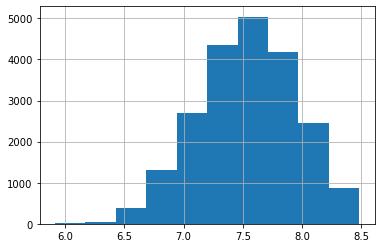

In [9]:
sqft_cleand = df.drop(df.loc[df['sqft_living'] > np.mean(df['sqft_living']) + (3 * np.std(df['sqft_living']))].index)
sqft_cleand['sqft_living'] = sqft_cleand['sqft_living'].map(lambda x: np.log(x))
sqft_cleand['sqft_living'].hist()

In [ ]:
ids = pd.DataFrame(df['id'].value_counts().sort_values(ascending=False)).reset_index()

In [ ]:
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built', ]], figsize=(20,20))

In [ ]:
df['sqft_lot'].hist()

In [ ]:
plt.scatter(x=df['sqft_lot'], y=df['price'])

In [ ]:
no_highs = df.drop(df.loc[df['sqft_lot'] > 20000].index)
no_highs['sqft_lot'].hist(bins=30), len(no_highs), no_highs['price'].hist()
plt.show()

In [ ]:
renovated_houses['index'].sort_values(ascending=False)

In [ ]:
len(df)

In [ ]:
price_fix = df.drop(df.loc[df['price'] > 2000000].index)
price_fix['price'].hist(bins=20)

In [ ]:
df['yr_renovated'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([0, 1], p=[.993, .007], size=len(df))))

In [ ]:
df['view'].unique()

In [ ]:
df['view'].value_counts()

In [ ]:
df['waterfront'].unique()

&lt;matplotlib.collections.PathCollection at 0x2577e3c57f0&gt;

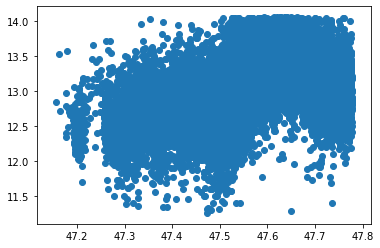

In [10]:
plt.scatter(x=df['lat'], y=df['price'])

&lt;matplotlib.collections.PathCollection at 0x2577e525f60&gt;

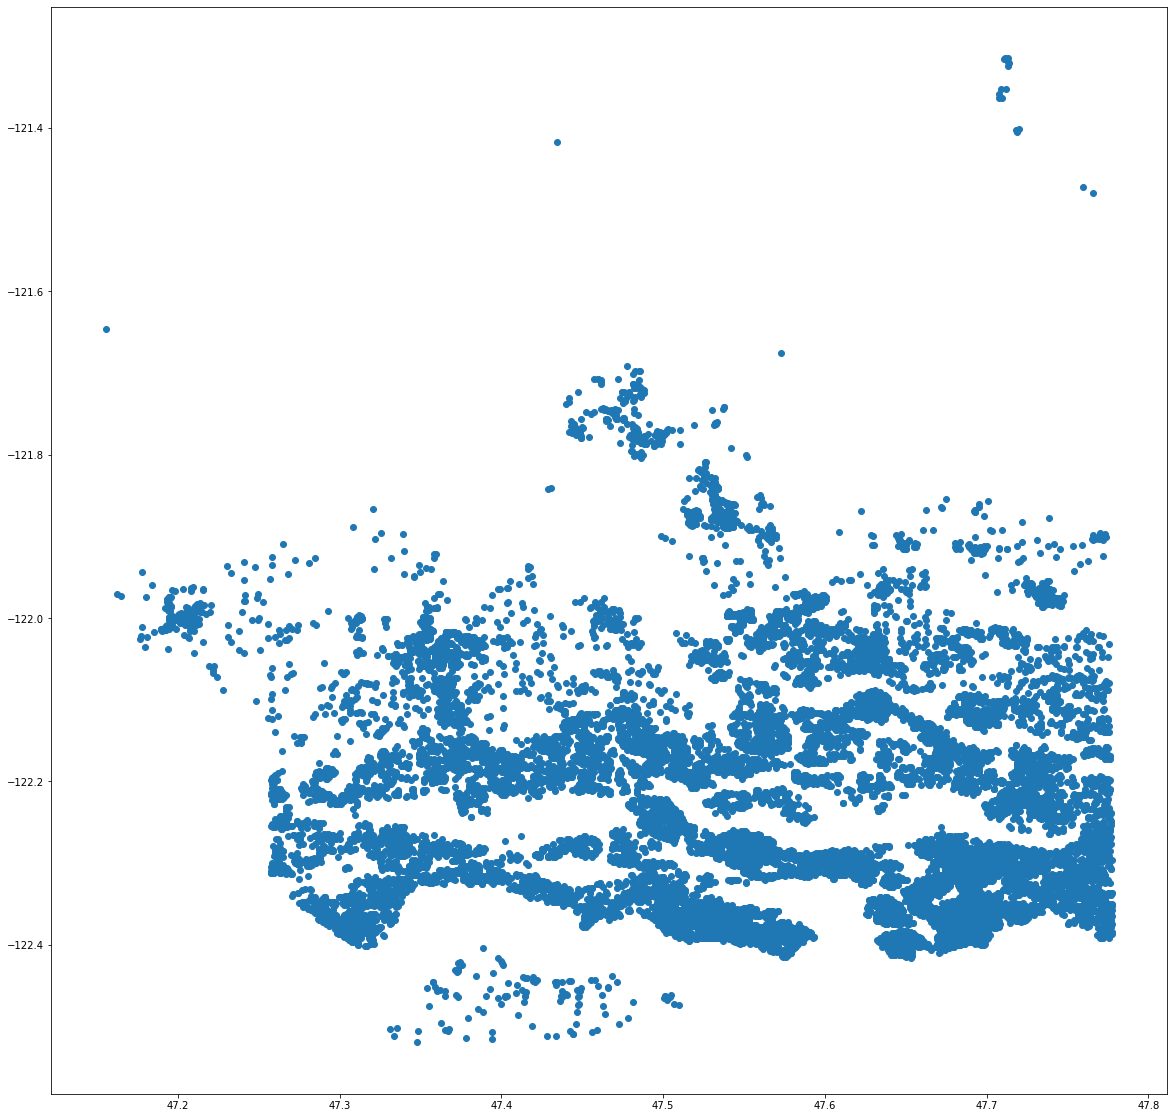

In [13]:
fig = plt.figure(figsize=(20, 20))
plt.scatter(x=df['lat'], y=df['long'])

In [ ]:
146/(19075+146)

In [ ]:
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([0, 1], p=[.993, .007], size=len(df))))

In [ ]:
new_water.value_counts()

In [ ]:
21439+158, len(df)

In [ ]:
df['price'].hist()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x139396c86a0&gt;

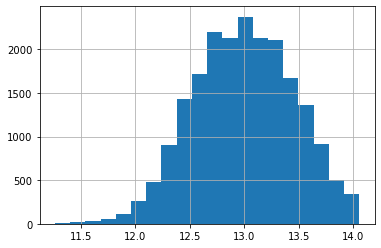

In [8]:
price_fix = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
price_fix['price'] = price_fix['price'].map(lambda x: np.log(x))
price_fix['price'].hist(bins=20)

In [ ]:
np.mean(df['price']) + (3 * np.std(df['price']))

In [ ]:
df.loc[df['price'] > np.mean(df['price']) + (3 * np.std(df['price']))]